# 2.2 Немного теории и энтропии

In [31]:
from sklearn import tree
from math import log2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# вопрос

## Представьте, что вы решили научить робота для животных отличать собачек от котиков. 
Для начала проанализируем данные  https://stepik.org/media/attachments/course/4852/dogs.csv - отметьте все верные утверждения о данном датафрэйме

In [3]:
dogs = pd.read_csv('dogs.csv')

In [4]:
dogs

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик


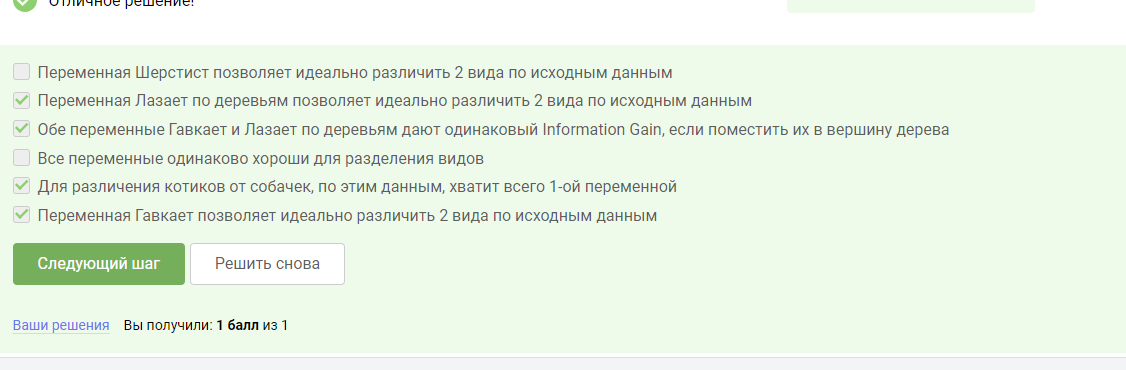

# вопрос

## В нашем Big Data датасэте появились новые наблюдения! 
https://stepik.org/media/attachments/course/4852/cats.csv
Давайте немного посчитаем энтропию, чтобы лучше понять, формализуемость разделения на группы.

In [7]:
cats = pd.read_csv('cats.csv', index_col=0)

In [8]:
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 (десятичный разделитель - точка, округляйте до 2-ого знака при необходимости).

И формула энтропии

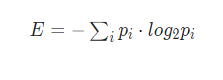

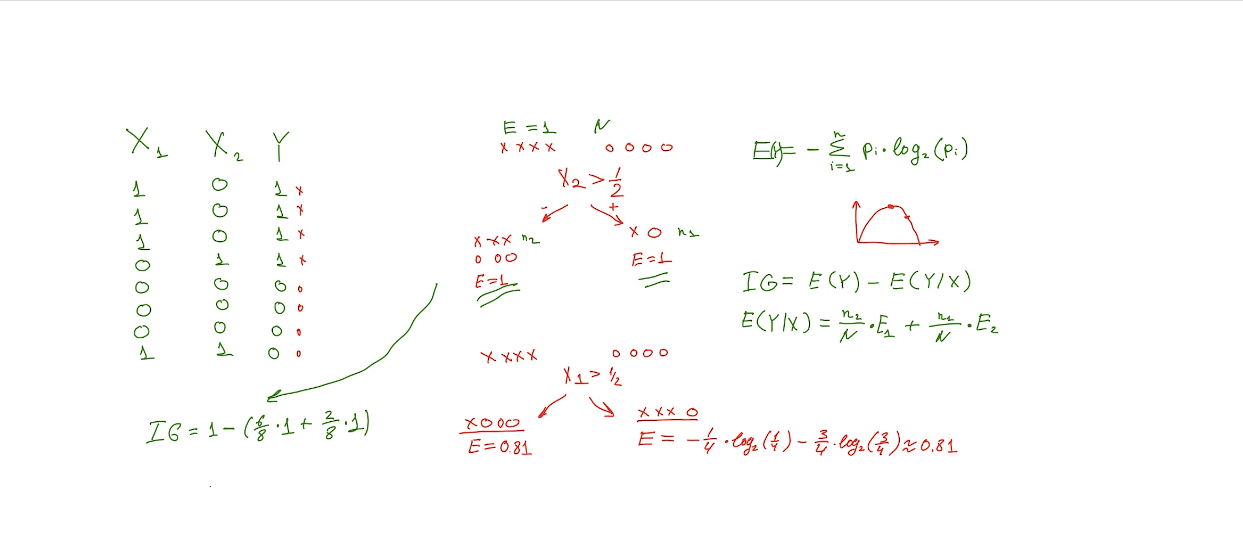

In [36]:
# изначальная
-(4/10)*log2(4/10)-(6/10)*log2(6/10)

0.9709505944546686

In [34]:
# по шерстит если 1 5/9 и 1/1 есои 0
# если 1
-(5/9)*log2(5/9)-(4/9)*log2(4/9)

0.9910760598382222

In [35]:
round(0.9910760598382222, 2)

0.99

In [33]:
# если 0
-1*log2(1) - 0

-0.0

In [32]:
# по гавкает если 1  1/5 если 0 5/5
# если 1
-(1/5)*log2(1/5)-(4/5)*log2(4/5)

0.7219280948873623

In [24]:
# если 0
-1*log(1) - 0

-0.0

In [ ]:
# по лазает по деревьям если 1 6/6 и 4/4 есои 0
# если 1
0 - 0

# log и log2 - РАЗНЫЕ

In [28]:
E_sh_0=(1/1)*log((1/1)) - 0
E_sh_1=-(4/9)*log((4/9)) - (5/9)*log((5/9))
E_gav_0=0 - (5/5)*log((5/5))
E_gav_1=-(4/5)*log((4/5)) - (1/5)*log((1/5))
E_laz_1=0 - (6/6)*log((6/6))
E_laz_0=-(4/4)*log((4/4)) - 0

In [29]:
E_sh_1

0.6869615765973234

In [30]:
E_gav_1

0.5004024235381879

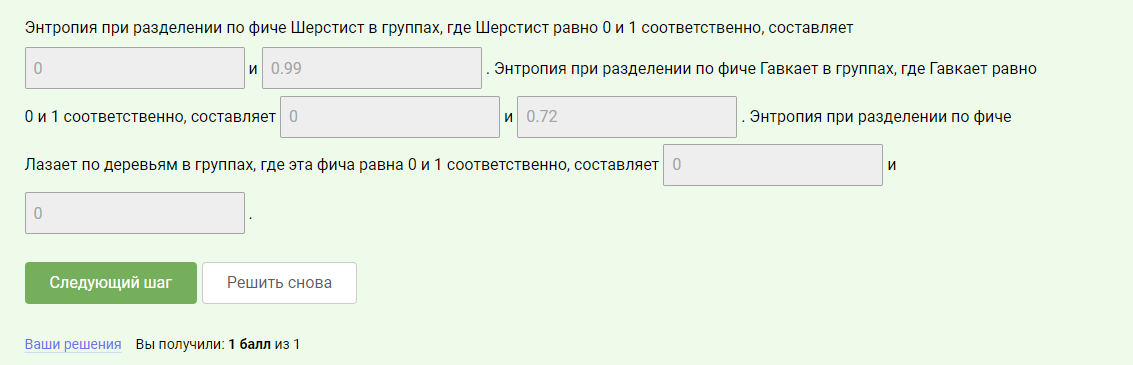

In [41]:
import pandas as pd
from scipy.stats import entropy


def ent(data):
    return entropy(data.Вид.value_counts() / len(data), base=2)


df = pd.read_csv('cats.csv', index_col=0)
print('Шерстист на 0: ', ent(df[df.Шерстист == 0]))
print('Шерстист на 1: ', ent(df[df.Шерстист == 1]))
print('Гавкает на 0: ', ent(df[df.Гавкает == 0]))
print('Гавкает на 1: ', ent(df[df.Гавкает == 1]))
print('Лазает по деревьям на 0: ', ent(df[df['Лазает по деревьям'] == 0]))
print('Лазает по деревьям на 1: ', ent(df[df['Лазает по деревьям'] == 1]))

Шерстист на 0:  0.0
Шерстист на 1:  0.9910760598382222
Гавкает на 0:  0.0
Гавкает на 1:  0.7219280948873623
Лазает по деревьям на 0:  0.0
Лазает по деревьям на 1:  0.0


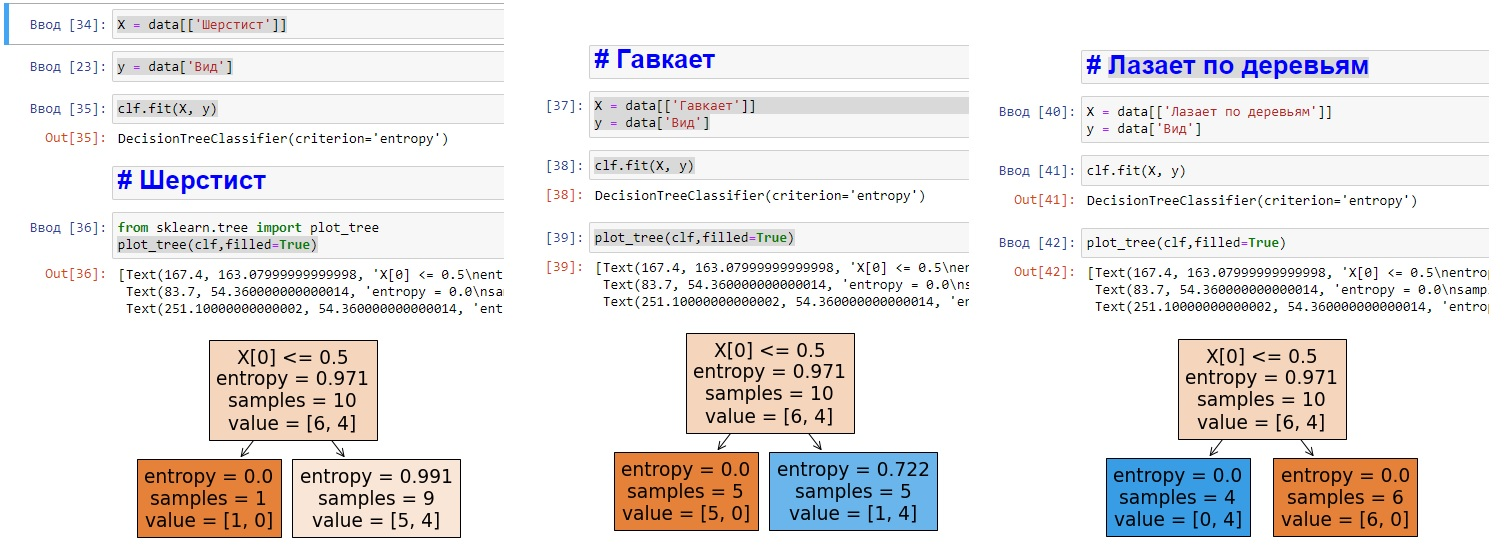

# вопрос 

## Ещё немного арифметики - посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые до 2-ого знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании является точка.

По какой переменной нужно делать сплит, исходя из всего этого (не вводите ответ на этот вопрос в поле, просто подумайте)

In [38]:
# шерстиcт
round(0.9709505944546686 - ((9/10)*0.9910760598382222 + 1/10 * 0),2)

0.08

In [39]:
# гавкает
round(0.9709505944546686 -((5/10)*0.7219280948873623 + 5/10*0),2)

0.61

In [40]:
# лазает по деревьям
round(0.9709505944546686 -((6/10)*0 + 4/10*0),2)

0.97

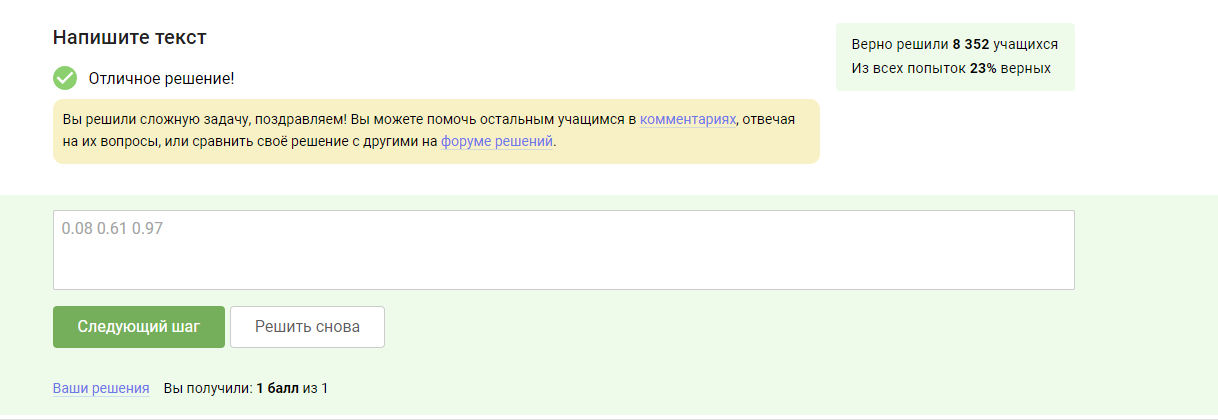